Text(0,0.5,'Sum of Rewards for each episode')

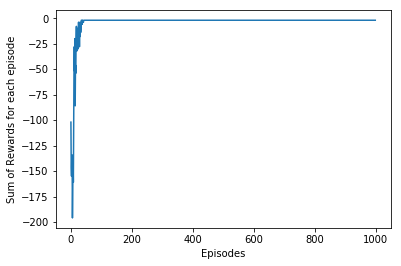

In [9]:
import numpy as np
import random 
import matplotlib.pyplot as plt

ACTION_LEFT = 0
ACTION_RIGHT = 1
ACTION_UP = 2
ACTION_DOWN = 3 

def policy(state, actionRewards, epsilon):
    r = np.random.random()
    if (r < epsilon):
        action = random.randint(0, 3)
    else:
        maxVal = actionRewards[0,state[0], state[1]]
        action = 0
        for i in range(1,4):
            if ((actionRewards[i, state[0], state[1]]) > maxVal):
                maxVal = actionRewards[i, state[0], state[1]]
                action = i
    return action


def getNextState(state, action, actionRewards):
    #dim = actionRewards.shape()
    row = 4#dim[1]
    col = 9#dim[2]
    i = state[0]
    j = state[1]
    if (action == ACTION_LEFT):
        j -= 1
        if (j<0):
            j+= 1;
    elif (action == ACTION_RIGHT):
        j+= 1
        if (j>col):
            j-= 1         
    elif (action == ACTION_UP):
        i-= 1
        if (i<0):
            i+= 1;
    elif (action == ACTION_DOWN):
        i+=1
        if (i>row):
            i-= 1
    return (i,j)

def isCliff(state) :
    cliff = 0
    i = state[1]
    if (i in range(1,9) and (state[0]==4)):
        cliff = 1
    return cliff
        
def getReward(state):
    reward = 0
    if (state == (4,9)):
        reward = 10
    elif (isCliff(state)):
        reward = -100
    else:
        reward = -1
    return reward


def sarsa(startState, absorbState, actionRewards, epsilon, alpha):
    rewardSumList = []

    for i in range(1,1000):
        state = startState
        action = policy(state, actionRewards, epsilon)
        rewardSum = 0
        while(state!=absorbState and isCliff(state)!=1): 
            nextState = getNextState(state, action, actionRewards)
            nextAction = policy(nextState, actionRewards, 0)
            nextReward = getReward(nextState)
            value = actionRewards[action, state[0], state[1]] + alpha*(nextReward + actionRewards[nextAction, nextState[0], nextState[1]] - actionRewards[action, state[0], state[1]])
            actionRewards[action, state[0], state[1]] = value
            state = nextState
            action = nextAction
            rewardSum += nextReward
        rewardSumList.append(rewardSum)
    return rewardSumList

epsilon = 0.1
alpha = 0.5
actionRewards = np.zeros((4, 5, 10))
startState = (4,0)
absorbState = (4,9)
rewardSumList = sarsa(startState, absorbState, actionRewards, epsilon, alpha)
x_list = []
for i in range(0,999):
    x_list.append(i)
fig = plt.figure()
plt.plot(x_list, rewardSumList)
plt.xlabel("Episodes")
plt.ylabel("Sum of Rewards for each episode")
#fig.savefig("qLearning-0.5.png")
